In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from fbprophet import Prophet

In [2]:
air_passenger_data = pd.read_csv(
    'https://raw.githubusercontent.com/AileenNielsen/TimeSeriesAnalysisWithPython/master/data/AirPassengers.csv')

In [3]:
air_passenger_data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
air_passenger_data.rename(columns={"Month":"ds", "#Passengers":"y"}, inplace=True)

In [5]:
air_passenger_data.head()

,ds,y
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [6]:
my_model = Prophet(interval_width=.95, seasonality_mode='multiplicative')

In [7]:
my_model.fit(air_passenger_data)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [8]:
future_date = my_model.make_future_dataframe(periods=36, freq='MS')
future_date.tail()

,ds
175,1963-08-01
176,1963-09-01
177,1963-10-01
178,1963-11-01
179,1963-12-01


In [9]:
forecast = my_model.predict(future_date)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,1949-01-01,114.121628,84.248287,125.615281,114.121628,114.121628,-0.089837,-0.089837,-0.089837,-0.089837,-0.089837,-0.089837,0.0,0.0,0.0,103.869279
1,1949-02-01,115.842443,80.670383,120.089334,115.842443,115.842443,-0.133357,-0.133357,-0.133357,-0.133357,-0.133357,-0.133357,0.0,0.0,0.0,100.394086
2,1949-03-01,117.396726,94.268921,135.014033,117.396726,117.396726,-0.021224,-0.021224,-0.021224,-0.021224,-0.021224,-0.021224,0.0,0.0,0.0,114.905149
3,1949-04-01,119.117541,96.085777,136.404469,119.117541,119.117541,-0.022560,-0.022560,-0.022560,-0.022560,-0.022560,-0.022560,0.0,0.0,0.0,116.430257
4,1949-05-01,120.782845,99.317217,139.893204,120.782845,120.782845,-0.011946,-0.011946,-0.011946,-0.011946,-0.011946,-0.011946,0.0,0.0,0.0,119.339954


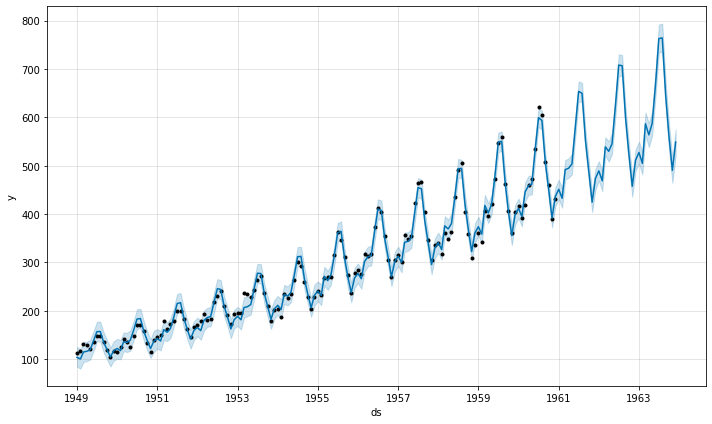

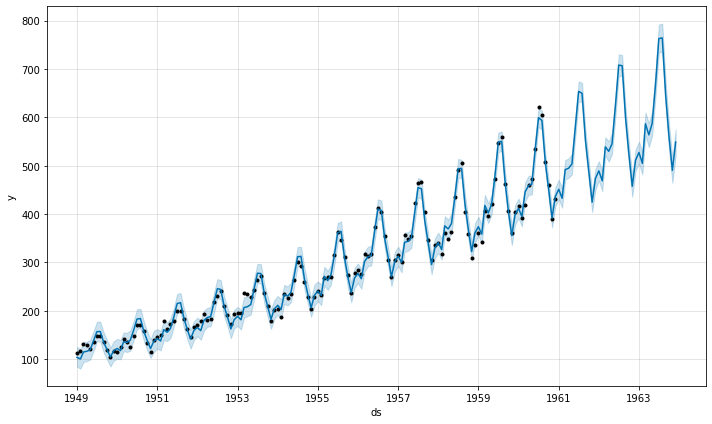

In [10]:
pd.plotting.register_matplotlib_converters()
my_model.plot(forecast, uncertainty=True)

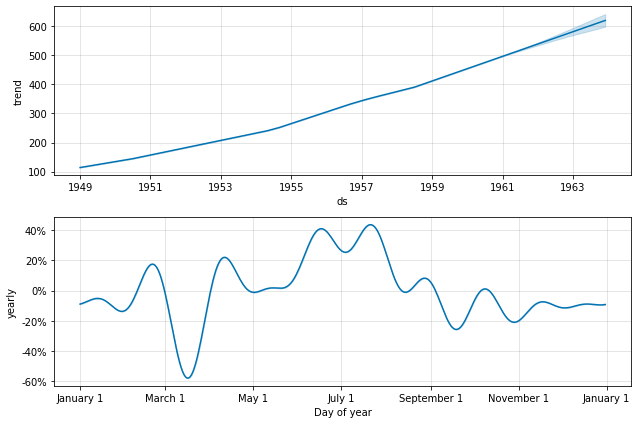

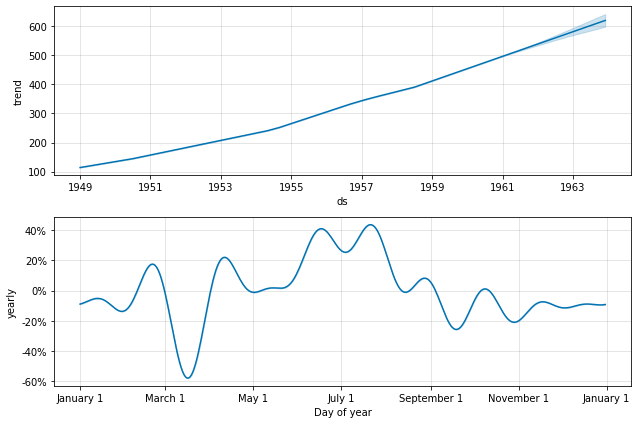

In [11]:
pd.plotting.register_matplotlib_converters()
my_model.plot_components(forecast)